In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mental Health Questionnaire 2.0.csv")

In [3]:
df

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,15-12-2021 13:18,shwetank1921@gmail.com,Kumar shwetank,Male,Yes,Unemployed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,4.0,43,Yes
154,15-12-2021 15:17,shukla.anu23@gmail.com,Anurag Shukla,Male,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,2-5 hours,1.0,Yes,Often,1.0,5.0,34,No
155,15-12-2021 21:52,anshikagrawal1@gmail.com,Anshika,Prefer not to say,No,Self-Employed,Tier 3 (Other cities/towns),Depressed,No,Yes,...,Yes,No,More than 10 hours,5.0,Yes,Very often,5.0,5.0,45,Yes
156,16-12-2021 09:36,mrubaiskhanji1998@gmail.com,Mohd. Ubais Khan,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,Maybe,No,...,Maybe,Maybe,2-5 hours,5.0,Not sure,Never,5.0,5.0,40,Yes


In [4]:
# for i in range(1,29):
#   df.columns = df.columns.str.replace(' ','_')

In [5]:
df.describe()

,How confident you have been feeling in your capabilities recently.,"If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction
count,158.000000,150.000000,155.000000,116.000000,158.000000
mean,3.417722,2.206667,2.929032,3.956897,34.879747
std,1.216737,1.401326,1.339266,1.189755,4.211536
min,1.000000,1.000000,1.000000,1.000000,26.000000
25%,3.000000,1.000000,2.000000,3.000000,32.000000
50%,3.500000,1.500000,3.000000,4.000000,35.000000
75%,4.000000,3.000000,4.000000,5.000000,38.000000
max,5.000000,5.000000,5.000000,5.000000,45.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             158 non-null    object 
 1   Email address                                                                                                         158 non-null    object 
 2   Name                                                                                                                  158 non-null    object 
 3   Gender                                                                                                                158 non-null    object 
 4   Are you 

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(158, 32)

In [9]:
#sns.pairplot(df)

In [10]:
df.isnull().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [11]:
df.drop(['How comfortable are you in talking about your mental health?'], axis=1,inplace=True)



In [12]:
df.drop(['Timestamp'], axis=1,inplace=True)

In [13]:
df.drop(['Email address'], axis=1,inplace=True)
	

In [14]:
df.drop(['Name'], axis=1,inplace=True)

In [15]:
mapping = {'Yes':1, 'No':0}
df['Prediction_status'] = df['Prediction_status'].replace(mapping)

In [16]:
df.head()

,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,...,Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,Prediction,Prediction_status
0,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,For some time,Evening,No,...,No,No,No,NaN,NaN,NaN,NaN,NaN,36,1
1,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,For some time,Morning,Yes,...,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,33,0
2,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,Significant time,Evening,No,...,No,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,34,0
3,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,Significant time,Evening,Not sure,...,No,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,35,1
4,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,Not sad,Afternoon,Yes,...,No,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,33,0


In [17]:
x=df.drop(['Prediction_status'], axis=1)
y=df['Prediction_status']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3) 


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 28 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Gender                                                                                                                158 non-null    object 
 1   Are you above 30 years of age?                                                                                        158 non-null    object 
 2   Employment Status                                                                                                     158 non-null    object 
 3   City                                                                                                                  158 non-null    object 
 4   How are 

In [21]:
df.columns

Index(['Gender', 'Are you above 30 years of age?', 'Employment Status', 'City',
       'How are you feeling today?', 'eating and sleeping',
       '(If sad)have you been in the same mental state for the past few days?',
       'Is your sadness momentarily or has it been constant for a long time?',
       'At what time of the day are you extremely low?',
       'Has there been a sudden and huge change in your life?',
       'Your stress is related to which of the following areas?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
       'How confident you have been feeling in your capabilities recently.',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
       'How frequently have you been doing things that mean something to you or your life?',
       'If you have a mental health condition, do you feel that it interferes with your work?',
       'How easy is it for you to take med

In [22]:
one_hot = pd.get_dummies(df, columns =["Gender", 'Are you above 30 years of age?', 'Employment Status', 'City',
       'How are you feeling today?', 'eating and sleeping',
       '(If sad)have you been in the same mental state for the past few days?',
       'Is your sadness momentarily or has it been constant for a long time?',
       'At what time of the day are you extremely low?',
       'Has there been a sudden and huge change in your life?',
       'Your stress is related to which of the following areas?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?','Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
       'How frequently have you been doing things that mean something to you or your life?',
       'If you have a mental health condition, do you feel that it interferes with your work?',
       'How easy is it for you to take medical leave for a mental health condition?',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
       'Have you taken any therapy or medication in the near past for mental health?',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?','Has the COVID-19 pandemic affected your mental well being?',
       'How often do you get offended or angry or start crying ?'])

In [23]:
data=one_hot.copy()

In [24]:
data.columns

Index(['How confident you have been feeling in your capabilities recently.',
       'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?',
       'How likely do you feel yourself vulnerable or lonely?', 'Prediction',
       'Prediction_status', 'Gender_Female', 'Gender_Male',
       'Gender_Prefer not to say', 'Are you above 30 years of age?_No',
       'Are you above 30 years of age?_Yes', 'Employment Status_Employed',
       'Employment Status_Self-Employed', 'Employment Status_Student',
       'Employment Status_Unemployed',
       'City_Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kolkata)',
       'City_Tier 2 (Capital cities Eg. Lucknow )',
       'City_Tier 3 (Other cities/towns)',
       'How are you feeling today?_Depressed',
       'How are you feeling today?_Fine', 'How are you feeling today?_Good',
       'How are you feeling today?_Sad', 'eating and sleeping_Maybe',
       'eating and sleeping_No', 'eating and 

In [25]:
#changing NAN values by imputer
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')

In [26]:
imp=imp.fit(one_hot)

In [27]:
one_hot = imp.transform(one_hot)

In [28]:
one_hot

array([[4.        , 2.20666667, 2.92903226, ..., 0.        , 0.        ,
        0.        ],
       [2.        , 2.20666667, 2.92903226, ..., 0.        , 0.        ,
        0.        ],
       [2.        , 1.        , 2.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 5.        , 5.        , ..., 0.        , 0.        ,
        1.        ],
       [5.        , 5.        , 5.        , ..., 0.        , 0.        ,
        0.        ],
       [4.        , 1.        , 3.        , ..., 0.        , 1.        ,
        0.        ]])

In [29]:
#changing numpy array into data frame
data=pd.DataFrame(one_hot,columns = ['How confident you have been feeling in your capabilities recently.',
       'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?',
       'How likely do you feel yourself vulnerable or lonely?', 'Prediction',
       'Prediction_status', 'Gender_Female', 'Gender_Male',
       'Gender_Prefer not to say', 'Are you above 30 years of age?_No',
       'Are you above 30 years of age?_Yes', 'Employment Status_Employed',
       'Employment Status_Self-Employed', 'Employment Status_Student',
       'Employment Status_Unemployed',
       'City_Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kolkata)',
       'City_Tier 2 (Capital cities Eg. Lucknow )',
       'City_Tier 3 (Other cities/towns)',
       'How are you feeling today?_Depressed',
       'How are you feeling today?_Fine', 'How are you feeling today?_Good',
       'How are you feeling today?_Sad', 'eating and sleeping_Maybe',
       'eating and sleeping_No', 'eating and sleeping_Yes',
       '(If sad)have you been in the same mental state for the past few days?_Maybe',
       '(If sad)have you been in the same mental state for the past few days?_No',
       '(If sad)have you been in the same mental state for the past few days?_Yes',
       'Is your sadness momentarily or has it been constant for a long time?_For some time',
       'Is your sadness momentarily or has it been constant for a long time?_Long time',
       'Is your sadness momentarily or has it been constant for a long time?_Not sad',
       'Is your sadness momentarily or has it been constant for a long time?_Significant time',
       'At what time of the day are you extremely low?_Afternoon',
       'At what time of the day are you extremely low?_Evening',
       'At what time of the day are you extremely low?_Morning',
       'Has there been a sudden and huge change in your life?_No',
       'Has there been a sudden and huge change in your life?_Not sure',
       'Has there been a sudden and huge change in your life?_Yes',
       'Your stress is related to which of the following areas?_Financial',
       'Your stress is related to which of the following areas?_Financial, Personal',
       'Your stress is related to which of the following areas?_Home',
       'Your stress is related to which of the following areas?_Home, Financial',
       'Your stress is related to which of the following areas?_Home, Financial, Personal',
       'Your stress is related to which of the following areas?_Home, Personal',
       'Your stress is related to which of the following areas?_Home, Work',
       'Your stress is related to which of the following areas?_Home, Work, Financial',
       'Your stress is related to which of the following areas?_Home, Work, Financial, Personal',
       'Your stress is related to which of the following areas?_Home, Work, Financial, Personal, None',
       'Your stress is related to which of the following areas?_Home, Work, Personal',
       'Your stress is related to which of the following areas?_Home, Work, Personal, None',
       'Your stress is related to which of the following areas?_None',
       'Your stress is related to which of the following areas?_Personal',
       'Your stress is related to which of the following areas?_Personal, None',
       'Your stress is related to which of the following areas?_Work',
       'Your stress is related to which of the following areas?_Work, Financial',
       'Your stress is related to which of the following areas?_Work, Financial, Personal',
       'Your stress is related to which of the following areas?_Work, Personal',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Never',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Often',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Sometimes',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Very Often',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Highly supportive',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Little bit',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Not at all',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Satisfactory',
       'How frequently have you been doing things that mean something to you or your life?_Never',
       'How frequently have you been doing things that mean something to you or your life?_Often',
       'How frequently have you been doing things that mean something to you or your life?_Sometimes',
       'How frequently have you been doing things that mean something to you or your life?_Very Often',
       'If you have a mental health condition, do you feel that it interferes with your work?_Maybe',
       'If you have a mental health condition, do you feel that it interferes with your work?_No',
       'If you have a mental health condition, do you feel that it interferes with your work?_Yes',
       'How easy is it for you to take medical leave for a mental health condition?_Difficult',
       'How easy is it for you to take medical leave for a mental health condition?_Easy',
       'How easy is it for you to take medical leave for a mental health condition?_Not so easy',
       'How easy is it for you to take medical leave for a mental health condition?_Very easy',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Never',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Often',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Sometimes',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Very Often',
       'Have you taken any therapy or medication in the near past for mental health?_Maybe',
       'Have you taken any therapy or medication in the near past for mental health?_No',
       'Have you taken any therapy or medication in the near past for mental health?_Yes',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?_Maybe',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?_No',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?_Yes',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?_Maybe',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?_No',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?_Yes',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_1-2 hours',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_2-5 hours',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_5-10 hours',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_More than 10 hours',
       'Has the COVID-19 pandemic affected your mental well being?_No',
       'Has the COVID-19 pandemic affected your mental well being?_Not sure',
       'Has the COVID-19 pandemic affected your mental well being?_Yes',
       'How often do you get offended or angry or start crying ?_Never',
       'How often do you get offended or angry or start crying ?_Often',
       'How often do you get offended or angry or start crying ?_Sometimes',
       'How often do you get offended or angry or start crying ?_Very often'])

In [30]:

'''data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('?','')
data.columns = data.columns.str.replace('(','')
data.columns = data.columns.str.replace(')','')'''

"data.columns = data.columns.str.replace(' ','_')\ndata.columns = data.columns.str.replace('?','')\ndata.columns = data.columns.str.replace('(','')\ndata.columns = data.columns.str.replace(')','')"

In [31]:
import re
temp = data.columns
temp1 = []
for i in temp:
    temp1.append(re.sub('[^a-zA-Z0-9 \n\.]', ' ', i))


In [32]:
temp1

['How confident you have been feeling in your capabilities recently.',
 'If sad  how likely are you to take an appointment with a psychologist or a counsellor for your current mental state ',
 'How likely do you feel yourself vulnerable or lonely ',
 'Prediction',
 'Prediction status',
 'Gender Female',
 'Gender Male',
 'Gender Prefer not to say',
 'Are you above 30 years of age  No',
 'Are you above 30 years of age  Yes',
 'Employment Status Employed',
 'Employment Status Self Employed',
 'Employment Status Student',
 'Employment Status Unemployed',
 'City Tier 1  Delhi  Mumbai  Bangalore  Chennai  Kolkata ',
 'City Tier 2  Capital cities Eg. Lucknow  ',
 'City Tier 3  Other cities towns ',
 'How are you feeling today  Depressed',
 'How are you feeling today  Fine',
 'How are you feeling today  Good',
 'How are you feeling today  Sad',
 'eating and sleeping Maybe',
 'eating and sleeping No',
 'eating and sleeping Yes',
 ' If sad have you been in the same mental state for the past few 

In [33]:
data.columns = temp1

In [34]:
data.columns

Index(['How confident you have been feeling in your capabilities recently.',
       'If sad  how likely are you to take an appointment with a psychologist or a counsellor for your current mental state ',
       'How likely do you feel yourself vulnerable or lonely ', 'Prediction',
       'Prediction status', 'Gender Female', 'Gender Male',
       'Gender Prefer not to say', 'Are you above 30 years of age  No',
       'Are you above 30 years of age  Yes', 'Employment Status Employed',
       'Employment Status Self Employed', 'Employment Status Student',
       'Employment Status Unemployed',
       'City Tier 1  Delhi  Mumbai  Bangalore  Chennai  Kolkata ',
       'City Tier 2  Capital cities Eg. Lucknow  ',
       'City Tier 3  Other cities towns ',
       'How are you feeling today  Depressed',
       'How are you feeling today  Fine', 'How are you feeling today  Good',
       'How are you feeling today  Sad', 'eating and sleeping Maybe',
       'eating and sleeping No', 'eating and 

In [35]:
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('.','_')

In [36]:
data

,How_confident_you_have_been_feeling_in_your_capabilities_recently_,If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_,How_likely_do_you_feel_yourself_vulnerable_or_lonely_,Prediction,Prediction_status,Gender_Female,Gender_Male,Gender_Prefer_not_to_say,Are_you_above_30_years_of_age__No,Are_you_above_30_years_of_age__Yes,...,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc___2_5_hours,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc___5_10_hours,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc___More_than_10_hours,Has_the_COVID_19_pandemic_affected_your_mental_well_being__No,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Not_sure,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Yes,How_often_do_you_get_offended_or_angry_or_start_crying___Never,How_often_do_you_get_offended_or_angry_or_start_crying___Often,How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes,How_often_do_you_get_offended_or_angry_or_start_crying___Very_often
0,4.0,2.206667,2.929032,36.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.206667,2.929032,33.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.000000,2.000000,34.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.0,1.000000,4.000000,35.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3.0,1.000000,4.000000,33.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,5.0,4.000000,4.000000,43.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
154,5.0,1.000000,1.000000,34.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
155,1.0,5.000000,5.000000,45.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
156,5.0,5.000000,5.000000,40.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
x=data.drop(['Prediction_status'], axis=1)
y=data['Prediction_status']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3) 

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [40]:

for num in range(2,20):
    dtc = DecisionTreeClassifier( criterion='gini', splitter='best', 
                                  max_depth=12, min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', random_state=413,
                                  max_leaf_nodes=num, min_impurity_decrease=0.0, 
                                  class_weight='balanced', ccp_alpha=0.0)
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    
    print('For max_leaf_nodes = %s' % num)
    print('F1 Score',f1_score(pred,y_test))
    print('AccuracyScore', accuracy_score(pred,y_test))
    print('Recall',recall_score(pred,y_test))
    print('Precision',precision_score(pred,y_test))
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 2
F1 Score 0.6530612244897959
AccuracyScore 0.6458333333333334
Recall 0.6666666666666666
Precision 0.64
Clusters =  [0. 1.]

For max_leaf_nodes = 3
F1 Score 0.631578947368421
AccuracyScore 0.7083333333333334
Recall 0.9230769230769231
Precision 0.48
Clusters =  [0. 1.]

For max_leaf_nodes = 4
F1 Score 0.6666666666666666
AccuracyScore 0.7083333333333334
Recall 0.8235294117647058
Precision 0.56
Clusters =  [0. 1.]

For max_leaf_nodes = 5
F1 Score 0.6666666666666666
AccuracyScore 0.7083333333333334
Recall 0.8235294117647058
Precision 0.56
Clusters =  [0. 1.]

For max_leaf_nodes = 6
F1 Score 0.6666666666666666
AccuracyScore 0.7083333333333334
Recall 0.8235294117647058
Precision 0.56
Clusters =  [0. 1.]

For max_leaf_nodes = 7
F1 Score 0.6829268292682927
AccuracyScore 0.7291666666666666
Recall 0.875
Precision 0.56
Clusters =  [0. 1.]

For max_leaf_nodes = 8
F1 Score 0.6666666666666666
AccuracyScore 0.7083333333333334
Recall 0.8235294117647058
Precision 0.56
Clusters =  [

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [42]:
num = 7

dtc = DecisionTreeClassifier( criterion='gini', splitter='best', 
                                  max_depth=None, min_samples_split=10, 
                                  min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', random_state=413,
                                  max_leaf_nodes=num, min_impurity_decrease=0.0, 
                                  class_weight='balanced', ccp_alpha=0.0)

skf = StratifiedKFold(n_splits=2) 
skf_scores_rf = cross_val_score(dtc, x, y, cv=skf,scoring='roc_auc')
print(skf_scores_rf.mean())



dtc.fit(x,y)

0.6826805816135084


DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=10, random_state=413)

In [43]:
#print(dtr.predict(x_train))

In [44]:
feats = x.columns

In [45]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_96 <= 0.50
|   |--- feature_2 <= 2.96
|   |   |--- feature_51 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_51 >  0.50
|   |   |   |--- class: 1.0
|   |--- feature_2 >  2.96
|   |   |--- feature_65 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_65 >  0.50
|   |   |   |--- class: 1.0
|--- feature_96 >  0.50
|   |--- feature_27 <= 0.50
|   |   |--- feature_62 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_62 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_27 >  0.50
|   |   |--- class: 1.0



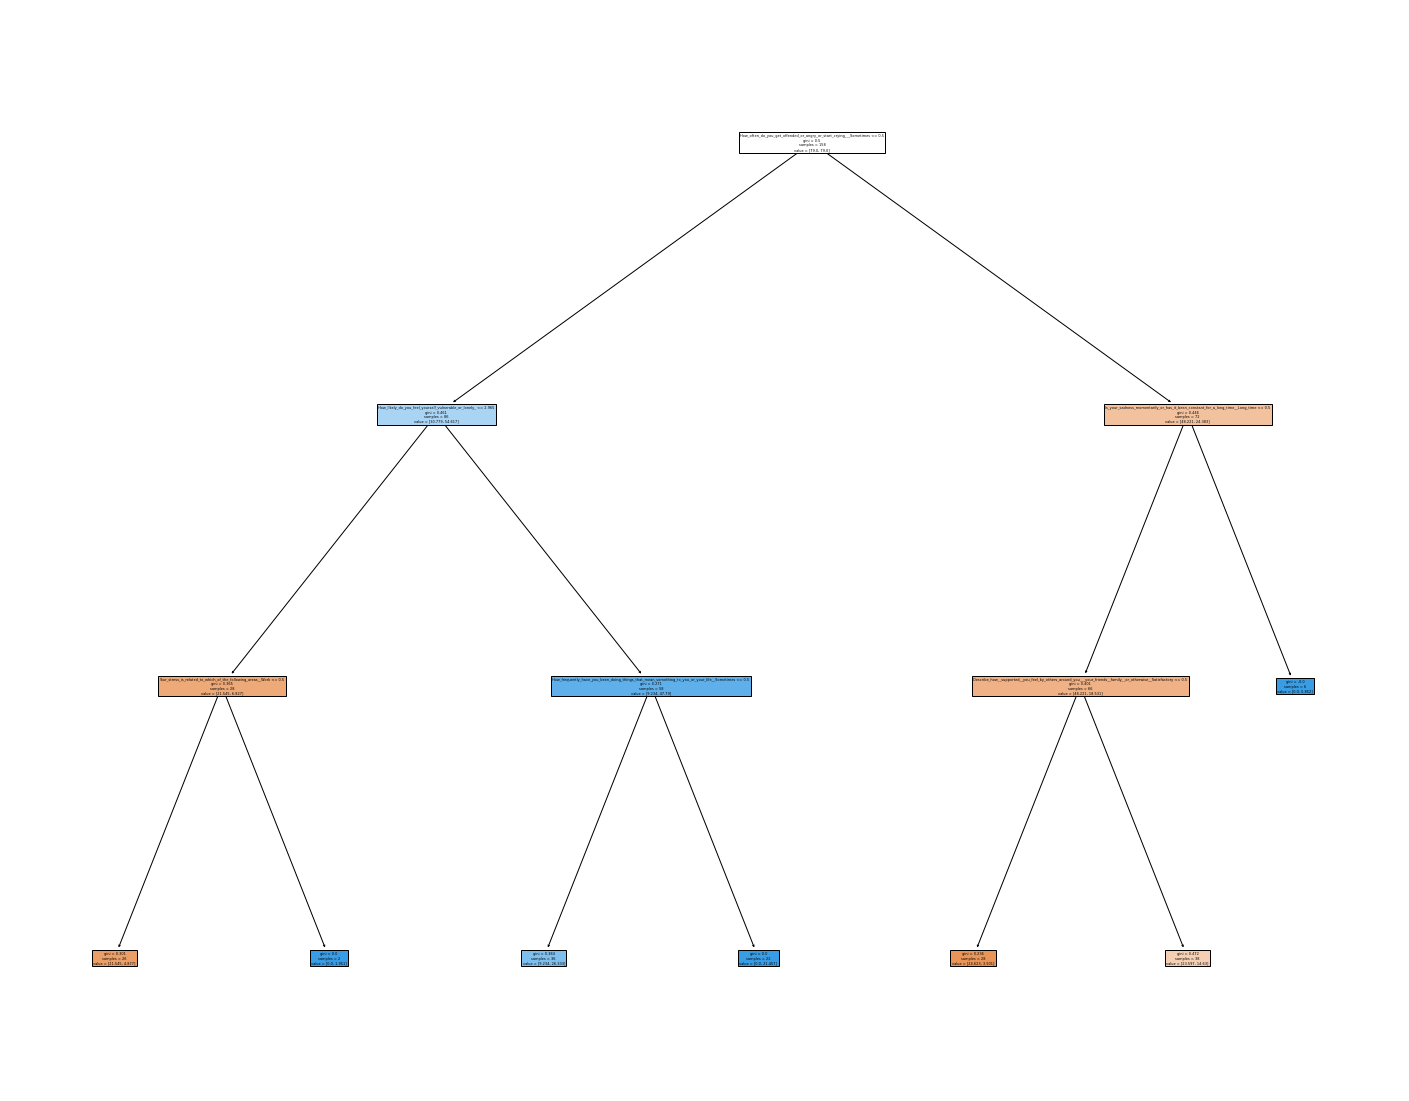

In [46]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=feats,  
                   
                   filled=True)

In [47]:
# from sklearn.tree import _tree

# def tree_to_code(tree, feature_names):
#     tree_ = tree.tree_
#     feature_name = [
#         feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
#         for i in tree_.feature
#     ]
#     feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
#     print("def predict({}):".format(", ".join(feature_names)))

#     def recurse(node, depth):
#         indent = "    " * depth
#         if tree_.feature[node] != _tree.TREE_UNDEFINED:
#             name = feature_name[node]
#             threshold = tree_.threshold[node]
#             print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
#             recurse(tree_.children_left[node], depth + 1)
#             print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
#             recurse(tree_.children_right[node], depth + 1)
#         else:
#             print("{}return {}".format(indent, tree_.value[node]))

#     recurse(0, 1)

In [48]:
from sklearn.tree import _tree


In [49]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [50]:
rules = get_rules(dtc, feats, None)
for r in rules:
    print(r)


if (How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5) and (Is_your_sadness_momentarily_or_has_it_been_constant_for_a_long_time__Long_time <= 0.5) and (Describe_how__supported__you_feel_by_others_around_you___your_friends__family__or_otherwise__Satisfactory > 0.5) then response: 23.597 | based on 38 samples
if (How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5) and (How_likely_do_you_feel_yourself_vulnerable_or_lonely_ > 2.965) and (How_frequently_have_you_been_doing_things_that_mean_something_to_you_or_your_life__Sometimes <= 0.5) then response: 9.234 | based on 36 samples
if (How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5) and (Is_your_sadness_momentarily_or_has_it_been_constant_for_a_long_time__Long_time <= 0.5) and (Describe_how__supported__you_feel_by_others_around_you___your_friends__family__or_otherwise__Satisfactory <= 0.5) then response: 24.623 | based on 28 samples
if (How_often_do_you_get_offended_or_an

In [51]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ""
        for p in path[:-1]:
            if rule != "":
                rule += " & "
            rule += str(p.strip('()'))
        rules += [rule]
        
    return rules

In [52]:
rules = get_rules(dtc, feats, None)
for r in rules:
    print(r)


How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5 & Is_your_sadness_momentarily_or_has_it_been_constant_for_a_long_time__Long_time <= 0.5 & Describe_how__supported__you_feel_by_others_around_you___your_friends__family__or_otherwise__Satisfactory > 0.5
How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5 & How_likely_do_you_feel_yourself_vulnerable_or_lonely_ > 2.965 & How_frequently_have_you_been_doing_things_that_mean_something_to_you_or_your_life__Sometimes <= 0.5
How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5 & Is_your_sadness_momentarily_or_has_it_been_constant_for_a_long_time__Long_time <= 0.5 & Describe_how__supported__you_feel_by_others_around_you___your_friends__family__or_otherwise__Satisfactory <= 0.5
How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5 & How_likely_do_you_feel_yourself_vulnerable_or_lonely_ <= 2.965 & Your_stress_is_related_to_which_of_the_following_areas__Work <= 0.5


In [53]:
clustering_df = x_train.copy()
clustering_df['LabelOfCluster'] = -1

In [54]:
clustering_df

,How_confident_you_have_been_feeling_in_your_capabilities_recently_,If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_,How_likely_do_you_feel_yourself_vulnerable_or_lonely_,Prediction,Gender_Female,Gender_Male,Gender_Prefer_not_to_say,Are_you_above_30_years_of_age__No,Are_you_above_30_years_of_age__Yes,Employment_Status_Employed,...,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc___5_10_hours,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc___More_than_10_hours,Has_the_COVID_19_pandemic_affected_your_mental_well_being__No,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Not_sure,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Yes,How_often_do_you_get_offended_or_angry_or_start_crying___Never,How_often_do_you_get_offended_or_angry_or_start_crying___Often,How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes,How_often_do_you_get_offended_or_angry_or_start_crying___Very_often,LabelOfCluster
41,1.0,1.0,5.0,37.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1
99,4.0,1.0,1.0,27.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1
121,3.0,1.0,3.0,30.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
135,4.0,2.0,3.0,34.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
150,2.0,1.0,4.0,39.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,5.0,3.0,5.0,37.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1
88,5.0,3.0,3.0,36.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
58,4.0,4.0,1.0,32.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
114,4.0,3.0,5.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1


In [55]:
clustering_df.columns

Index(['How_confident_you_have_been_feeling_in_your_capabilities_recently_',
       'If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_',
       'How_likely_do_you_feel_yourself_vulnerable_or_lonely_', 'Prediction',
       'Gender_Female', 'Gender_Male', 'Gender_Prefer_not_to_say',
       'Are_you_above_30_years_of_age__No',
       'Are_you_above_30_years_of_age__Yes', 'Employment_Status_Employed',
       'Employment_Status_Self_Employed', 'Employment_Status_Student',
       'Employment_Status_Unemployed',
       'City_Tier_1__Delhi__Mumbai__Bangalore__Chennai__Kolkata_',
       'City_Tier_2__Capital_cities_Eg__Lucknow__',
       'City_Tier_3__Other_cities_towns_',
       'How_are_you_feeling_today__Depressed',
       'How_are_you_feeling_today__Fine', 'How_are_you_feeling_today__Good',
       'How_are_you_feeling_today__Sad', 'eating_and_sleeping_Maybe',
       'eating_and_sleeping_No', 'eating_and_sleeping_Yes',
      

In [56]:
clustering_df.columns

Index(['How_confident_you_have_been_feeling_in_your_capabilities_recently_',
       'If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_',
       'How_likely_do_you_feel_yourself_vulnerable_or_lonely_', 'Prediction',
       'Gender_Female', 'Gender_Male', 'Gender_Prefer_not_to_say',
       'Are_you_above_30_years_of_age__No',
       'Are_you_above_30_years_of_age__Yes', 'Employment_Status_Employed',
       'Employment_Status_Self_Employed', 'Employment_Status_Student',
       'Employment_Status_Unemployed',
       'City_Tier_1__Delhi__Mumbai__Bangalore__Chennai__Kolkata_',
       'City_Tier_2__Capital_cities_Eg__Lucknow__',
       'City_Tier_3__Other_cities_towns_',
       'How_are_you_feeling_today__Depressed',
       'How_are_you_feeling_today__Fine', 'How_are_you_feeling_today__Good',
       'How_are_you_feeling_today__Sad', 'eating_and_sleeping_Maybe',
       'eating_and_sleeping_No', 'eating_and_sleeping_Yes',
      

In [57]:
rules = get_rules(dtc, feats, None)
i=0
final_df = pd.DataFrame()
for r in rules:
    print(r)
    temp_df = clustering_df.query(r)
    temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
    final_df = final_df.append(temp_df)
    i=i+1

How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5 & Is_your_sadness_momentarily_or_has_it_been_constant_for_a_long_time__Long_time <= 0.5 & Describe_how__supported__you_feel_by_others_around_you___your_friends__family__or_otherwise__Satisfactory > 0.5
How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5 & How_likely_do_you_feel_yourself_vulnerable_or_lonely_ > 2.965 & How_frequently_have_you_been_doing_things_that_mean_something_to_you_or_your_life__Sometimes <= 0.5
How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5 & Is_your_sadness_momentarily_or_has_it_been_constant_for_a_long_time__Long_time <= 0.5 & Describe_how__supported__you_feel_by_others_around_you___your_friends__family__or_otherwise__Satisfactory <= 0.5
How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5 & How_likely_do_you_feel_yourself_vulnerable_or_lonely_ <= 2.965 & Your_stress_is_related_to_which_of_the_following_areas__Work <= 0.5


In [58]:
final_df['LabelOfCluster'].value_counts()

1    31
0    25
2    19
3    16
4    14
5     4
6     1
Name: LabelOfCluster, dtype: int64

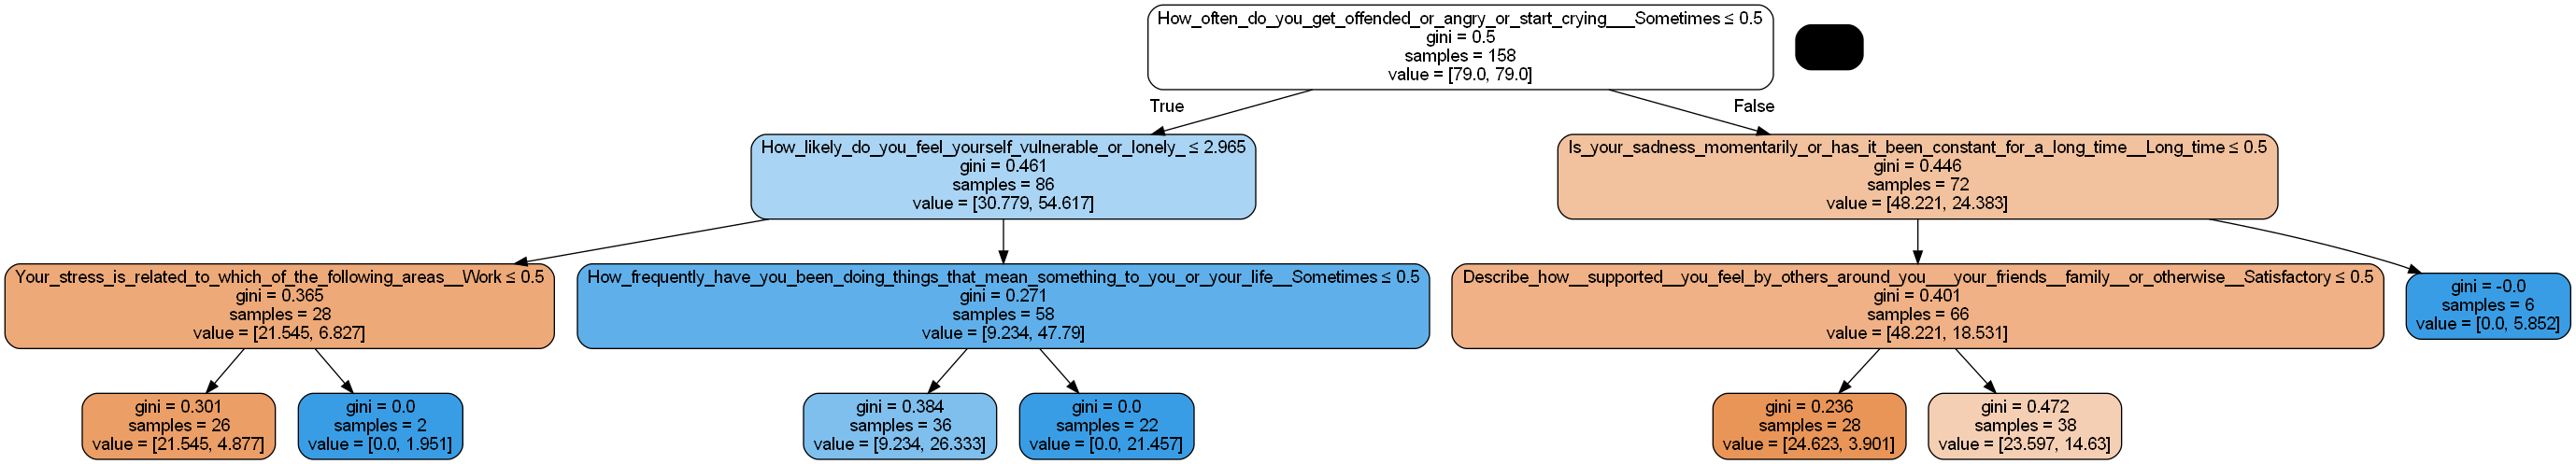

In [59]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feats)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Credit.png')
Image(graph.create_png())